# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

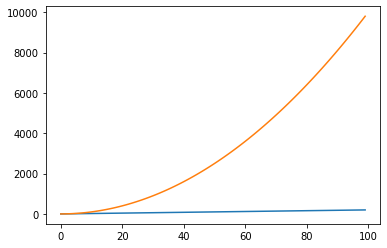

In [3]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

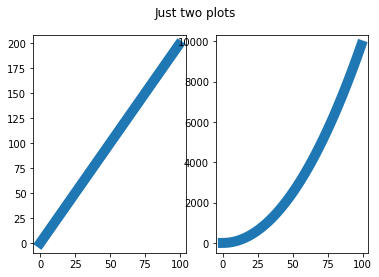

In [4]:
# Method 2
fig, axs = plt.subplots(nrows=1,ncols=2)
fig.suptitle('Just two plots')
plt.rcParams['lines.linewidth'] = 10
axs[0].plot(x, y)
axs[1].plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'probability of accident')

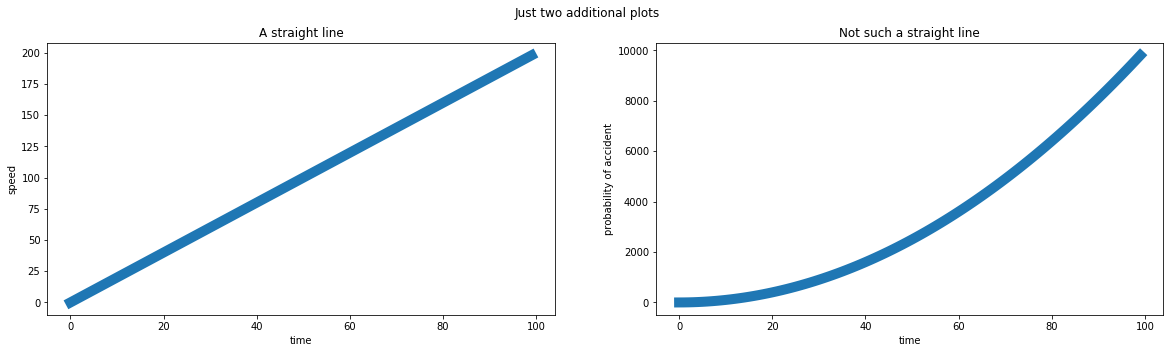

In [5]:
# your code here
# BOOOOORIIIIING :P

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20, 5))
fig.suptitle('Just two additional plots')
plt.rcParams['lines.linewidth'] = 10

axs[0].plot(x, y)
axs[1].plot(x, z)

axs[0].set_title('A straight line')
axs[0].set_xlabel('time')
axs[0].set_ylabel('speed')
axs[1].set_title('Not such a straight line')
axs[1].set_xlabel('time')
axs[1].set_ylabel('probability of accident')


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

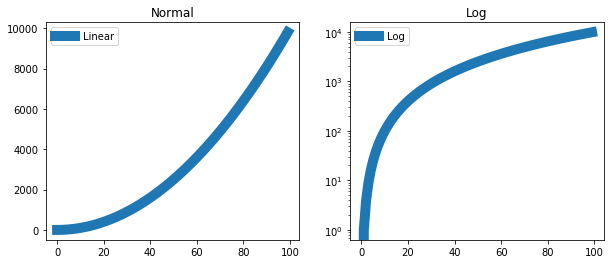

In [6]:
# your code here
# I have no idea if this is what you are asking

x = np.arange(0,100)
y = x ** 2

# plot with various axes scales
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# linear

axs[0].plot(x, y, label = 'Linear')
axs[0].set_yscale('linear')
axs[0].set_title('Normal')
axs[0].legend()

# linear
axs[1].plot(x, y, label = 'Log')
axs[1].set_yscale('log')
axs[1].set_title('Log')
axs[1].legend()


#### As a bonus challenge, try to add a legend to the plot.

In [7]:
# your code here


# done on previous

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

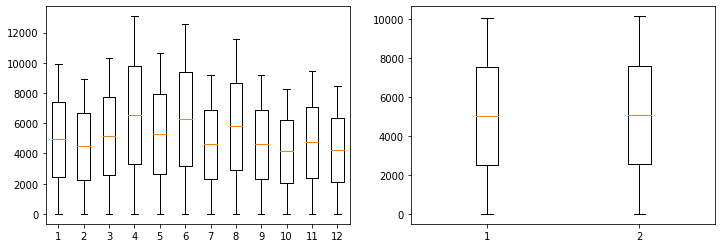

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
# I will assume you want the daily average number of steps by month

month_step_avg = fitbit[['Steps','Months_encoded',]].groupby(by='Months_encoded').mean().reset_index()

fig, ax = plt.subplots(1,2,figsize = (12,4))

month_plot = ax[0].boxplot(month_step_avg)

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

w_step_avg = fitbit[['Steps','Work_or_Weekend',]].groupby(by='Work_or_Weekend').mean().reset_index()

w_plot = ax[1].boxplot(w_step_avg)


# Assuming zeros are weekend, Fitbitter is more active on workdays


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

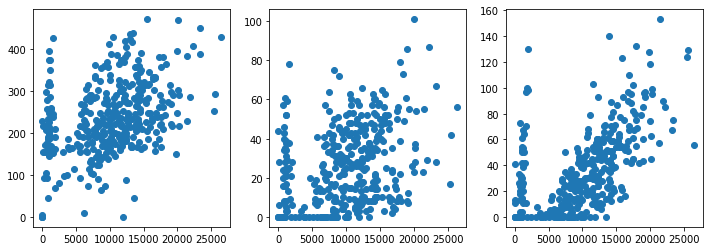

In [10]:
# your code here
fig, ax = plt.subplots(1,3, figsize=(12 ,4))
plt.rcParams['lines.linewidth'] = 2
for number in range(3):
    ax[number].scatter(fitbit['Steps'],fitbit.iloc[:,number+6])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(('int','float'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [92]:
# your code here
import seaborn as sns # FREEEEDOOOOOOMMMMMMM


#### Use the right visulalization to show the distribution of column `Age`.

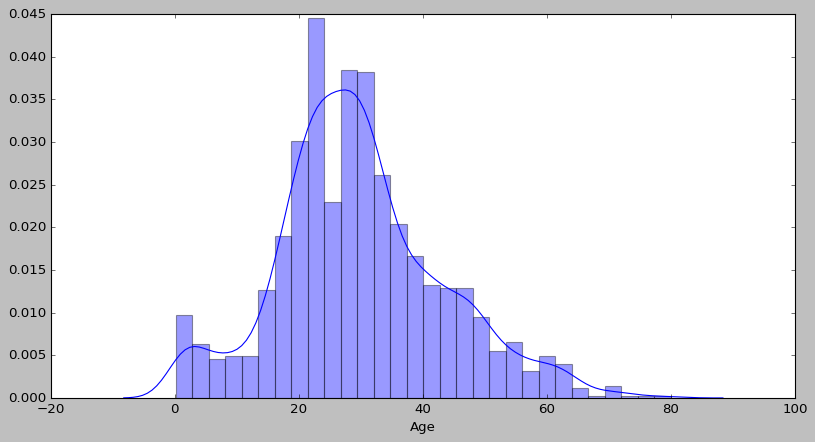

In [101]:
# your code here

fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(titanic['Age'])
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

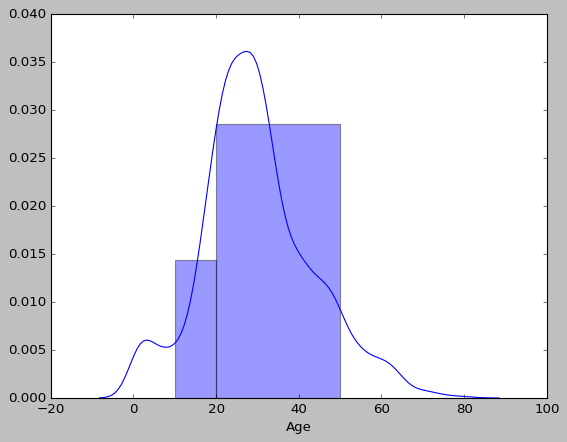

In [108]:
# your code here

sns.distplot(titanic['Age'], bins=[10,20,50])
plt.show()

#### How does the bin size affect your plot?

In [18]:
"""
your comments here
"""
# Shows the distribution only for the cases with ages between 10-20 and 20-50.

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

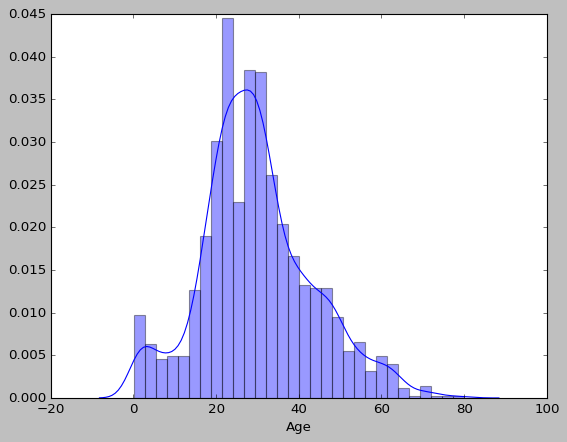

In [110]:
# your code here

sns.distplot(titanic['Age'])
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

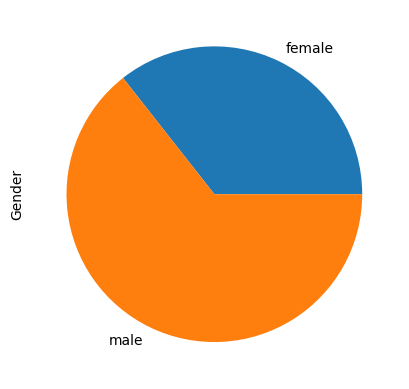

In [126]:
# Method 1 - matplotlib
# your code here

titanic.groupby(by='Gender')['Gender'].count().plot.pie()
plt.show()

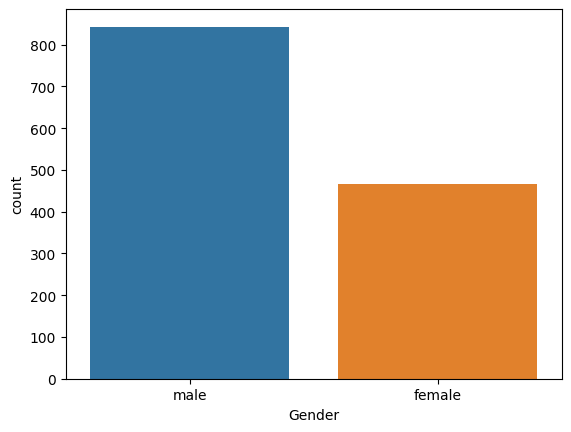

In [128]:
# Method 2 - seaborn
# your code here

sns.countplot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

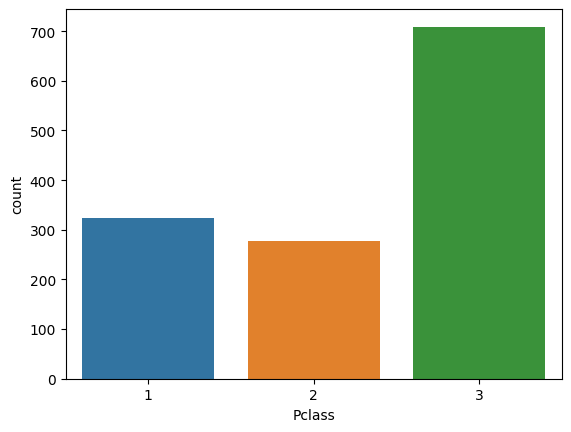

In [129]:
# your code here
sns.countplot(titanic['Pclass'])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

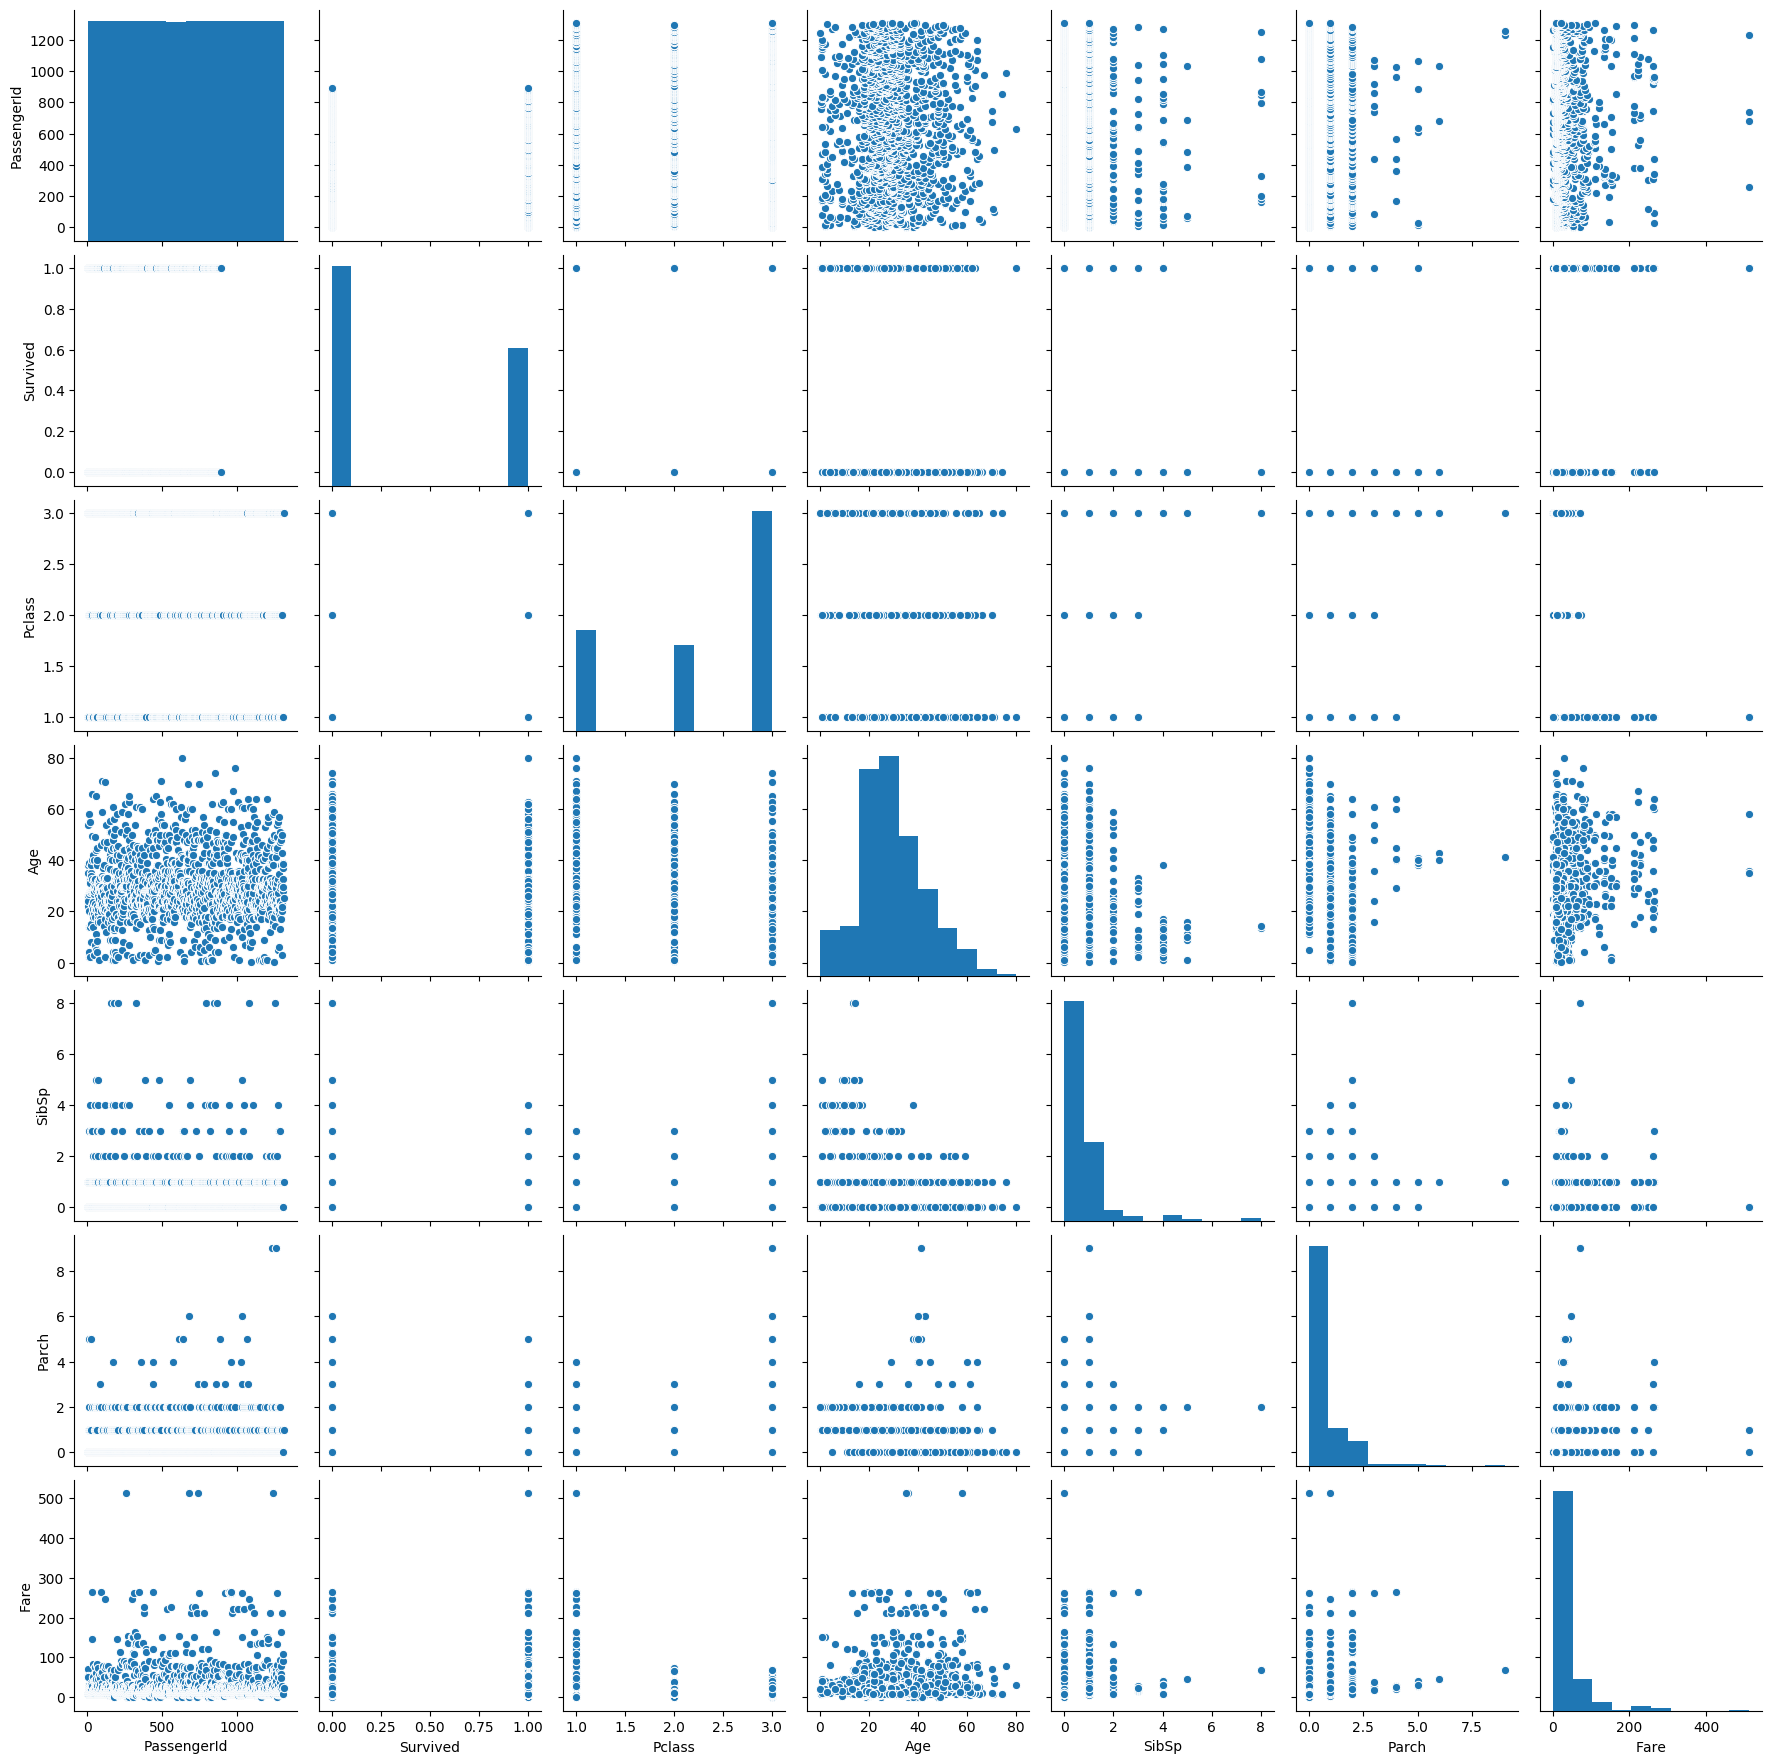

In [139]:
sns.pairplot(titanic)

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
Sample average around 30s.
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [26]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [28]:
# Method 1 - matplotlib
# your code here

In [29]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [30]:
# your code here

#### What are the most correlated features?

In [31]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [32]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [33]:
# your code here